# **Simple Linear Regression**

We can use NumPy function numpy.polyfit to calculate the line of best fit coefficients (slope, intercept), or we can try to calculate them ourselves.

Line equation:

$y = mx + c$

https://en.wikipedia.org/wiki/Simple_linear_regression

In [37]:
import numpy as np
import matplotlib.pyplot as plt

Create x array (independent variable) and y (dependent variable):

In [38]:
x = np.linspace(0.0, 10.0,  21) # array 0.0 to 10.0 with 21 points
y = 2.0 * x + 1.0 

Scatterplot of x and y:

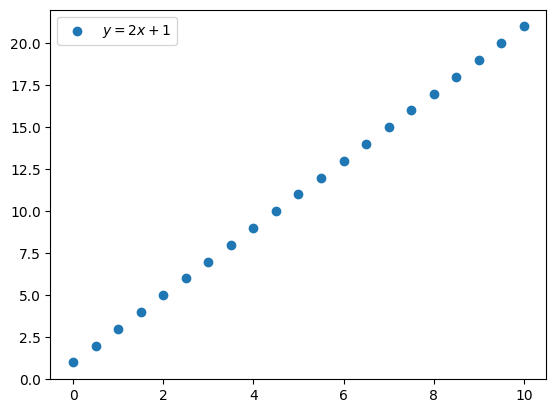

In [39]:
fig, ax = plt.subplots() # create a figure and axis
ax.scatter(x, y, label = "$y=2x+1$"); # scatter plot    
ax.legend() # add legend


Polyfit to calculate the line of best fit coefficients:

In [40]:
np.polyfit(x, y, 1) # fit a polynomial of degree 1 to the data

array([2., 1.])

## Formula from Wikipedia to calculate the line of best fit coefficients

https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation


We need to calculate the x bar (mean of x) and y bar (mean of y) first:

In [41]:

x_bar= np.mean(x) # mean of x
y_bar= np.mean(y) # mean of y


Calculate the slope (m) and the intercept (c):

In [42]:

numerator = np.sum((x-x_bar)*(y-y_bar)) # numerator of slope, we use np.sum to sum the elements of the array
denominator = np.sum((x-x_bar)**2) # denominator of slope, we use np.sum to sum the elements of the array

m = numerator / denominator # slope of the line 

c = y_bar - m * x_bar # intercept of the line

print(f"Slope: {m:.2f}, Intercept: {c:.2f}") # print intercept and slope as float with 2 decimal places

Slope: 2.00, Intercept: 1.00


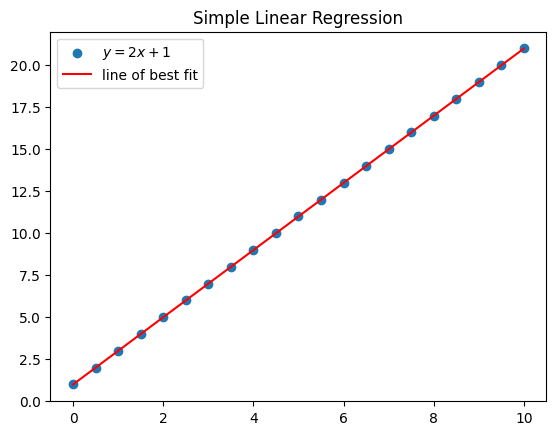

In [43]:
fig, ax = plt.subplots() # create a figure and axis
ax.scatter(x, y, label = "$y=2x+1$"); # scatter plot
ax.plot(x, m*x + c, color='red', label = "line of best fit"); # plot the line
ax.legend() # add legend
plt.title("Simple Linear Regression"); # title of the plot

### Add some noise:

In [44]:
y = 2.0 * x + 1.0 + np.random.normal(0, 1, len(x)) # add noise to the data

Apply the formula to the new data with noise:

In [45]:
y_bar= np.mean(y) # mean of y
numerator = np.sum((x-x_bar)*(y-y_bar)) 
denominator = np.sum((x-x_bar)**2)
m = numerator / denominator  
c = y_bar - m * x_bar 
print(f"Slope: {m:.2f}, Intercept: {c:.2f}") 

Slope: 2.01, Intercept: 1.27


Create the scatterplot with the line of best fit:

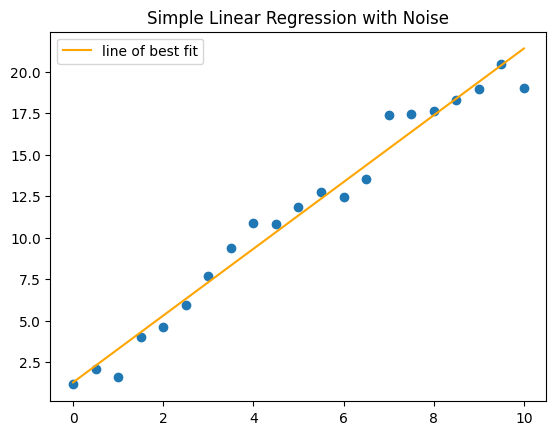

In [46]:
fig, ax = plt.subplots()
ax.scatter(x, y); 
ax.plot(x, m*x + c, color = "orange", label = "line of best fit"); 
ax.legend() 
plt.title("Simple Linear Regression with Noise");

### Analytical Approach

**Ordinary Least Square:** while looking for the line of best fit, a prediction for each data point is being made. The accuracy of each prediction is measured by its squared residual (square of the vertical distance between the real data point and the fitted line). In the resulting fitted line the sum of these square deviations should be as small as possible.  
In reference to a specific data point, we can define the distance of the data point from the line of best fit as follows:

$y_i - mx_i$

When taking into account all the data points:

$\sum_i(y_i - mx_i)$

The distance of the data points from the line of best fit can be expressed in the squared form to avoid positive and negative values to cancel each other out.  
This collective distance (Cost(m)), that we want to minimize as much as possible, can be defined as:

$Cost(m) = \sum_i(y_i - mx_i)^2$

Applying the formula outlined in WikiPedia (https://en.wikipedia.org/wiki/Simple_linear_regression#Simple_linear_regression_without_the_intercept_term_(single_regressor)), with c = 0, we can derive the following value for the slope (m) of the fitted line:

$m = \sum_ix_iy_i / \sum_ix_i^2$



In case $c \neq 0$, we'll need to calculate it too.

### Machine Learning Approach 

In [47]:
y = 3.0 * x + np.random.normal(0.0, 1.0, x.size)
# define Cost(m) function
def cost(m):
    return np.sum((m * x - y) **2)
# show Cost(m) for m = 3
cost(3)

np.float64(12.138890092143754)

Create a range of different m values:

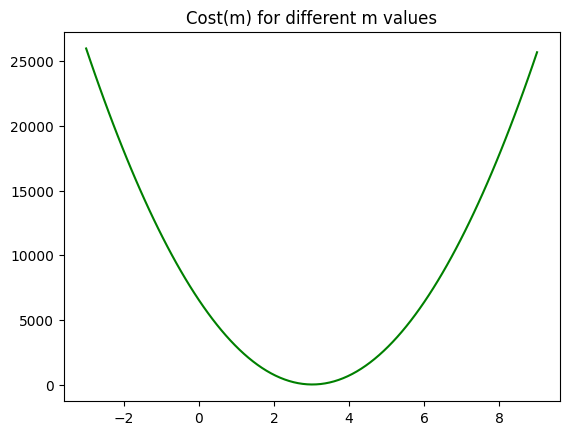

In [48]:
m = np.linspace(-3.0, 9.0, 101)
costs = np.array([cost(mi) for mi in m])
# plot the cost function:
fig, ax = plt.subplots()
ax.plot(m, costs, color = "green");
ax.set_title("Cost(m) for different m values");

As expected, the resulting plot is a parabula, with the minimum value = m, in this case m = 3. 

**m optimization hack:** 

When we don't know the value of m and don't want to carry out all the calculations, we can try and guess the value of m through progressively improved guesses using the ML approach.  
We begin by trying to guess the value of m. Progressively, through several iterations, our function adjusts the value of our guess by adding and subtracting a small amount from it (alpha), calculating the cost(m) for these two values and comparing it to the cost(m) of the previous guess.
The value with the lowest cost(m) determines the direction on the curve. The adjustments on the guess will continue until the point characterized by the smallest value of cost(m) is detected. At that point the iterations stop and this m value will be used for the fitted line.  

This process can be also described as a gradual descent. We are looking for the point where the derivative will be equal to 0. 

In [ ]:
guess = 1.0 # take a wild guess

alpha = 1.0 # adjust learning rate

keep_going = True 

iterations = 0

# gradient descent
while keep_going:
    iterations += 1 # count the iterations
    if cost(guess + alpha) < cost(guess):
        guess += alpha
    elif cost(guess - alpha) < cost(guess):
        guess -= alpha
    else: 
        keep_going = False

print(guess, iterations)

3.0 3


Compare the result of the ML approach with the analytical approach (formula):

In [57]:
np.sum(x * y) / np.sum (x * x)

np.float64(3.0169374171844745)

They are very close.  
Compare these two results with the np.polyfit result:

In [58]:
m, c = np.polyfit(x, y, 1)
print (m, c)

3.0172101116466647 -0.0018634121582939232


## Changing slope and intercept

#### **c = 0**

The line equation without intercept (c = 0) is:

$y = mx$

Since the intercept is 0, the line will always cross the origin (0,0). Its steepness and direction will be determined by the slope (m).

We can't use the np.polyfit function when c = 0, but we can apply a simple formula to calculate the slope.

https://en.wikipedia.org/wiki/Simple_linear_regression#Simple_linear_regression_without_the_intercept_term_(single_regressor)

In [52]:
m = np.sum((x * y)) / np.sum((x * x))
print(f"Slope: {m:.2f}") # print slope as float with 2 decimal places

Slope: 3.02


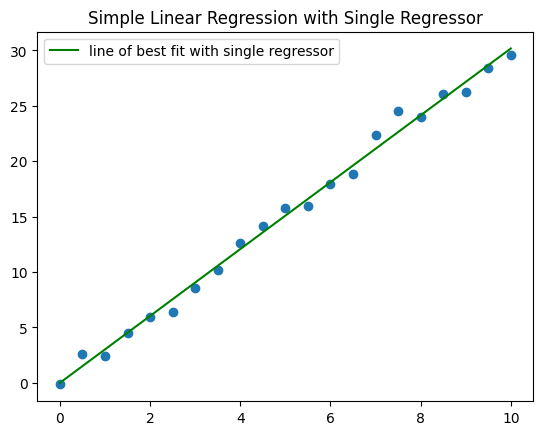

In [53]:
fig, ax = plt.subplots()
ax.scatter(x, y);
ax.plot(x, m*x, color = "green", label = "line of best fit with single regressor");
ax.legend()
plt.title("Simple Linear Regression with Single Regressor");

The value of the slope (m) can change, but the line will always cross the origin (0, 0).

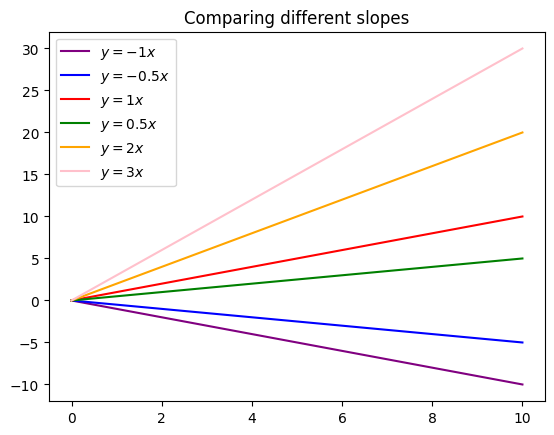

In [54]:
fig, ax = plt.subplots()
plt.plot(x, -1 * x, color = "purple", label = "$y = -1x$");
plt.plot(x, -0.5 * x, color = "blue", label = "$y = -0.5x$");
plt.plot(x, 1 * x, color = "red", label = "$y = 1x$");
plt.plot(x, 0.5 * x, color = "green", label = "$y = 0.5x$");
plt.plot(x, 2 * x, color = "orange", label = "$y = 2x$");
plt.plot(x, 3 * x, color = "pink", label = "$y = 3x$");
plt.legend()
plt.title("Comparing different slopes");

#### **m = 1**

Line with m = 1:

$y = x + c$

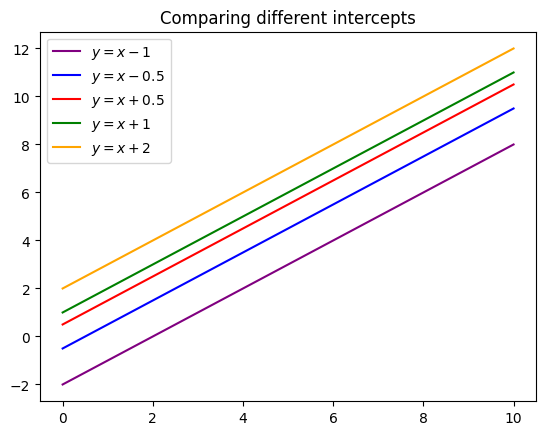

In [55]:
fig, ax = plt.subplots()
plt.plot(x, x + -2, color = "purple", label = "$y = x - 1$");
plt.plot(x, x + -0.5, color = "blue", label = "$y = x - 0.5$");
plt.plot(x, x + 0.5, color = "red", label = "$y = x + 0.5$");
plt.plot(x, x + 1, color = "green", label = "$y = x + 1$");
plt.plot(x, x + 2, color = "orange", label = "$y = x + 2$");
plt.legend()
plt.title("Comparing different intercepts");

## END